# DFT Demo
### Wenjie Chen
### May 14, 2019

## 1. Definition in `numpy.fft`

The definition of discrete Fourier transform (DFT) in `numpy.fft` is
$$
A_k = \sum_{m = 0}^{n-1} a_m \exp\left\{-2\pi i \frac{mk}{n}\right\}, \qquad k = 0,~1,~\dots,~n-1.
$$
The DFT is in general defined for complex inputs and outputs.

Accordingly, the inverse DFT is defined as
$$
a_m = \frac{1}{n} \sum_{k = 0}^{n-1} A_k \exp\left\{2\pi i \frac{mk}{n}\right\}, \qquad m = 0,~1,~\dots,~n-1.
$$

Data structure: if `A = fft(a, n)`, then
* `A[0]` contains the zero-frequency term (the sum of the signal);
* `A[1:n/2]` contains the positive-frequency terms;
* `A[n/2+1:]` contains the negative-frequency terms

For an even number of input points, `A[n/2]` represents both positive and negative Nyquist frequency, and is also purely real for real input. For an odd number of input points, `A[(n-1)/2]` contains the largest positive frequency, while `A[(n+1)/2]` contains the largest negative frequency. The routine `np.fft.fftfreq(n)` returns an array giving the frequencies of corresponding elements in the output. 

For detailed manual, see [scipy documents](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html).

## 2. Functions in `numpy.fft`

|   FFTs   |   functions   |
|----------|---------------|
| Standard | `fft`, `ifft`, `fft2`, `ifft2`, `fftn`, `ifftn`|
| Real (for real input)    | `rfft`, `irfft`, `rfft2`, `irfft2`, `rfftn`, `irfftn`|
| Hermitian (for real spectrum) | `hfft`, `ihfft` |
| Helper Routines | `fftfreq`, `rfftfreq`, `fftshift`, `ifftshift` |

## 3. Data Analysis Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

### 3.1 Import Data

In [2]:
# Read data
datablock = []
with open('demo-pulse-train_1.csv', newline='') as csvfile:
    datareader = csv.reader(csvfile, delimiter=',', quotechar='|')
    line_num = 0
    for row in datareader:
        if line_num == 0:
            print(f'Column names are {", ".join(row)}')
        else:
            datablock.append([float(row[0]), float(row[1])])
        line_num = line_num + 1
    print(f'Processed {line_num} lines.')
                  
# Process data
datablock = np.transpose(np.array(datablock))
(time, signal) = (datablock[0], datablock[1]) # t is time (ms), I is sound intensity (dB).

Column names are time, signal
Processed 50001 lines.


In [3]:
# Read data
datablock = []
with open('demo-pulse-train_2.csv', newline='') as csvfile:
    datareader = csv.reader(csvfile, delimiter=',', quotechar='|')
    line_num = 0
    for row in datareader:
        if line_num == 0:
            print(f'Column names are {", ".join(row)}')
        else:
            datablock.append([float(row[0]), float(row[1])])
        line_num = line_num + 1
    print(f'Processed {line_num} lines.')
                  
# Process data
datablock = np.transpose(np.array(datablock))
(time2, signal2) = (datablock[0], datablock[1]) # t is time (ms), I is sound intensity (dB).

Column names are time, signal
Processed 50001 lines.


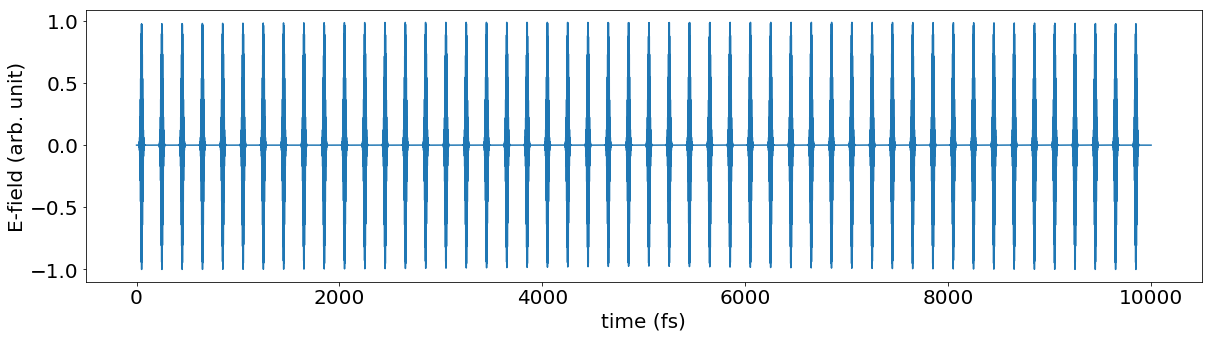

In [4]:
# Plot the figure
plt.figure(figsize=(20,5))
plt.rcParams.update({'font.size': 20})
plt.plot(time, signal)
plt.xlabel("time (fs)")
plt.ylabel("E-field (arb. unit)")
plt.show()

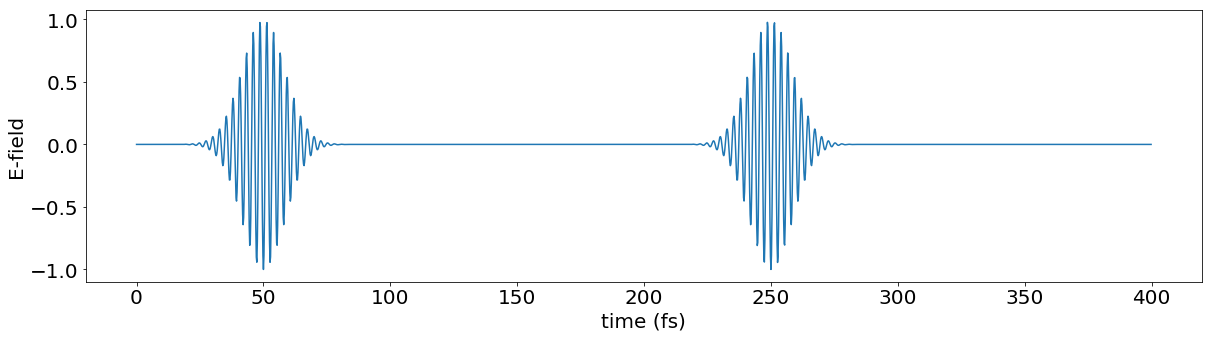

In [5]:
# Plot the figure
plt.figure(figsize=(20,5))
plt.rcParams.update({'font.size': 20})
plt.plot(time[:2000], signal[:2000])
plt.xlabel("time (fs)")
plt.ylabel("E-field")
plt.show()

### 3.2 Standard Discrete Fourier Transform

In [6]:
n = len(signal)
n

50000

In [7]:
SIGNAL = np.fft.fft(signal, n)
timestep = time[1]
freq = np.fft.fftfreq(n, d=timestep)

In [8]:
freq

array([ 0.00000e+00,  9.99980e-05,  1.99996e-04, ..., -2.99994e-04,
       -1.99996e-04, -9.99980e-05])

In [9]:
SIGNAL[0]

(5.723724250117357e-08+0j)

In [10]:
# change the order of data
SIGNAL_ordered = np.fft.fftshift(SIGNAL)
freq_ordered = np.fft.fftshift(freq)

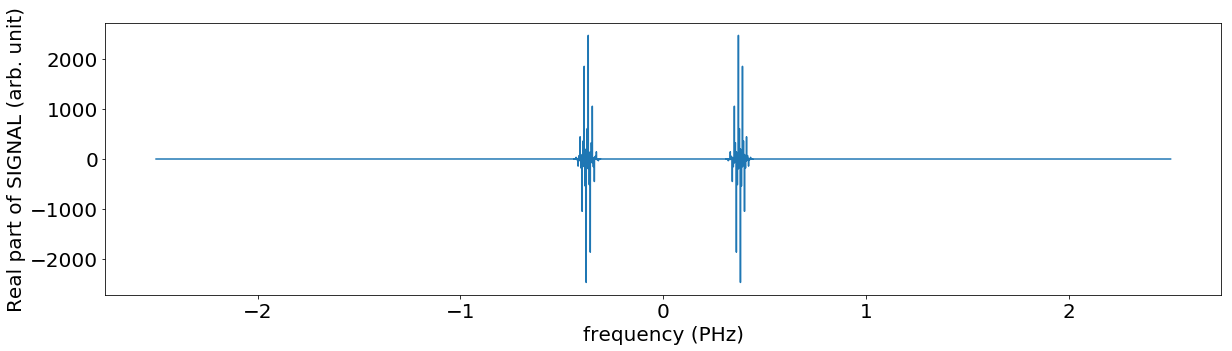

In [11]:
# Plot the figure
plt.figure(figsize=(20,5))
plt.rcParams.update({'font.size': 20})
plt.plot(freq_ordered, SIGNAL_ordered.real)
plt.xlabel("frequency (PHz)")
plt.ylabel("Real part of SIGNAL (arb. unit)")
plt.show()

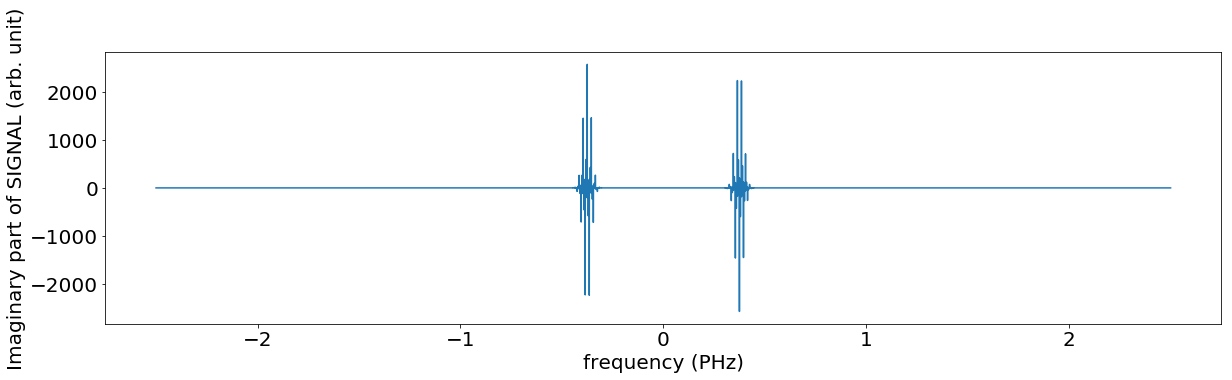

In [12]:
# Plot the figure
plt.figure(figsize=(20,5))
plt.rcParams.update({'font.size': 20})
plt.plot(freq_ordered, SIGNAL_ordered.imag)
plt.xlabel("frequency (PHz)")
plt.ylabel("Imaginary part of SIGNAL (arb. unit)")
plt.show()

### 3.3 Real Discrete Fourier Transform

In [13]:
rSIGNAL = np.fft.rfft(signal, n)
timestep = time[1]
rfreq = np.fft.rfftfreq(n, d=timestep)

In [14]:
len(rfreq)

25001

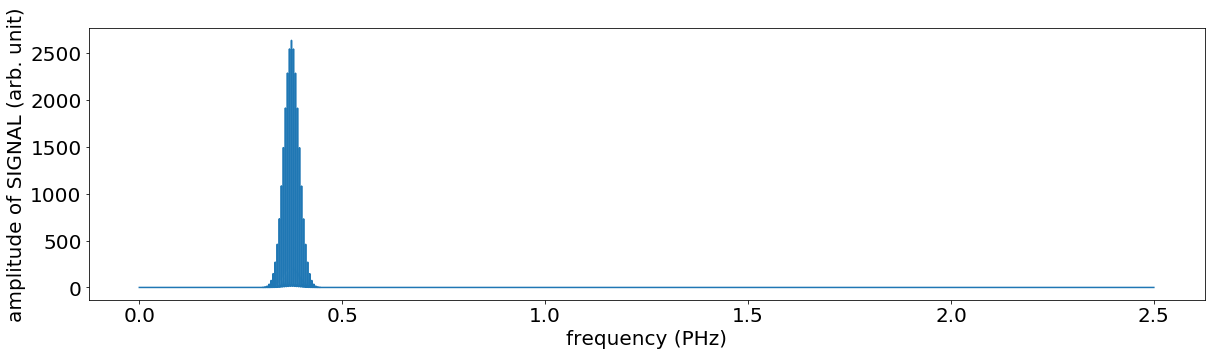

In [15]:
# Plot the figure
plt.figure(figsize=(20,5))
plt.rcParams.update({'font.size': 20})
plt.plot(rfreq, np.absolute(rSIGNAL))
plt.xlabel("frequency (PHz)")
plt.ylabel("amplitude of SIGNAL (arb. unit)")
plt.show()

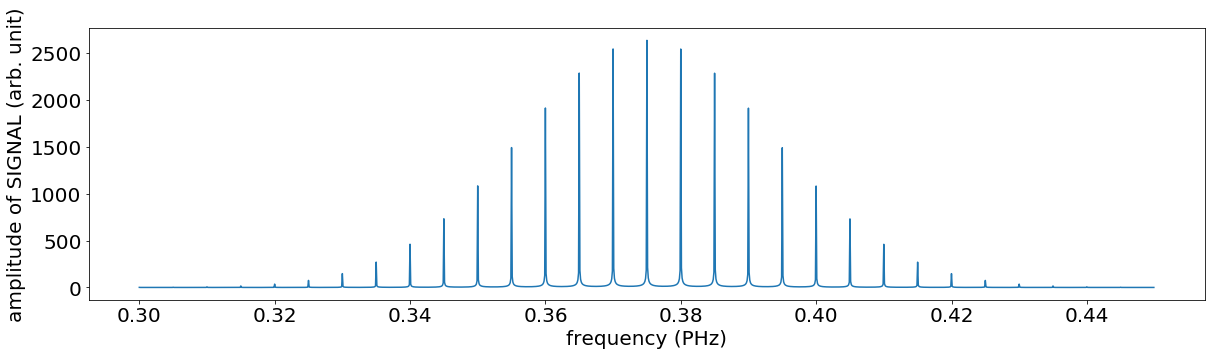

In [16]:
# Plot the figure
plt.figure(figsize=(20,5))
plt.rcParams.update({'font.size': 20})
plt.plot(rfreq[3000:4500], np.absolute(rSIGNAL)[3000:4500])
plt.xlabel("frequency (PHz)")
plt.ylabel("amplitude of SIGNAL (arb. unit)")
plt.show()

Compare with a smaller repetition rate signal.

In [19]:
rSIGNAL2 = np.fft.rfft(signal2, n)

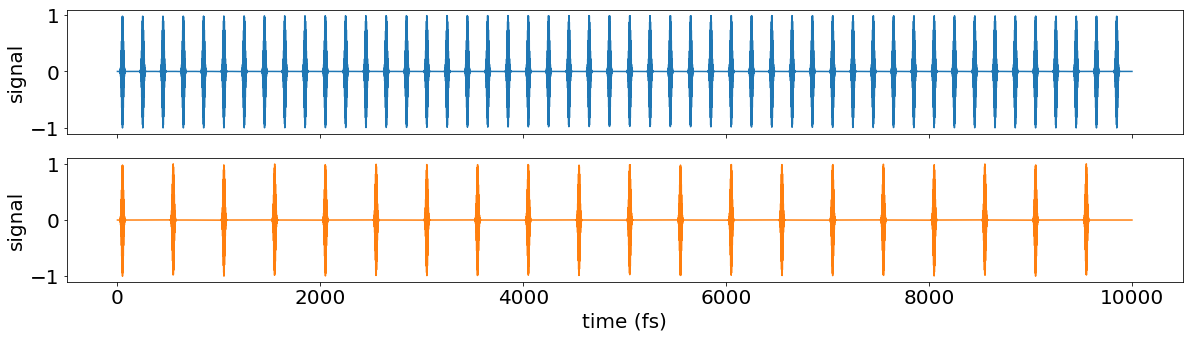

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col', figsize=(20,5))
ax1.plot(time, signal, color = 'C0')
ax2.plot(time2, signal2, color = 'C1')
ax2.set_xlabel("time (fs)")
ax1.set_ylabel("signal")
ax2.set_ylabel("signal")
plt.show()

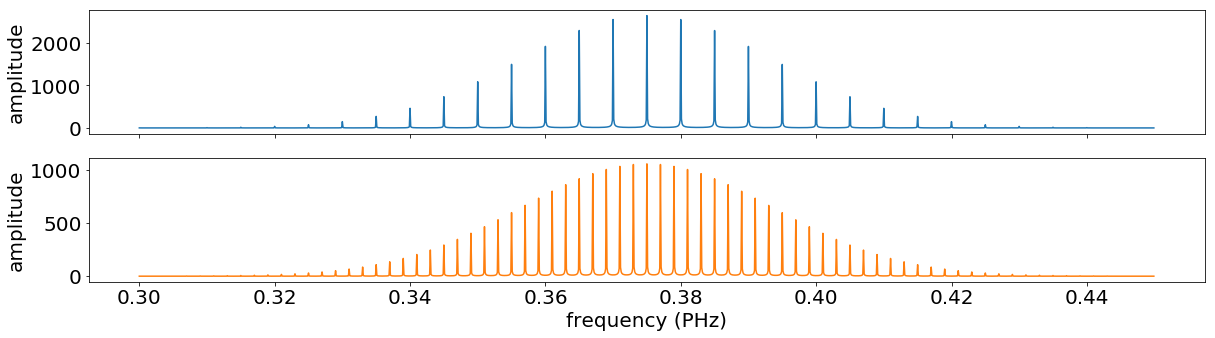

In [25]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col', figsize=(20,5))
ax1.plot(rfreq[3000:4500], np.absolute(rSIGNAL)[3000:4500], color = 'C0')
ax2.plot(rfreq[3000:4500], np.absolute(rSIGNAL2)[3000:4500], color = 'C1')
ax2.set_xlabel("frequency (PHz)")
ax1.set_ylabel("amplitude")
ax2.set_ylabel("amplitude")
plt.show()

## 4. Complex Analytical Signal (CAS)

In [22]:
SIGNALp = SIGNAL.copy()
SIGNALp[int(n/2)+1:] = 0
signalp = np.fft.ifft(SIGNALp) # CAS

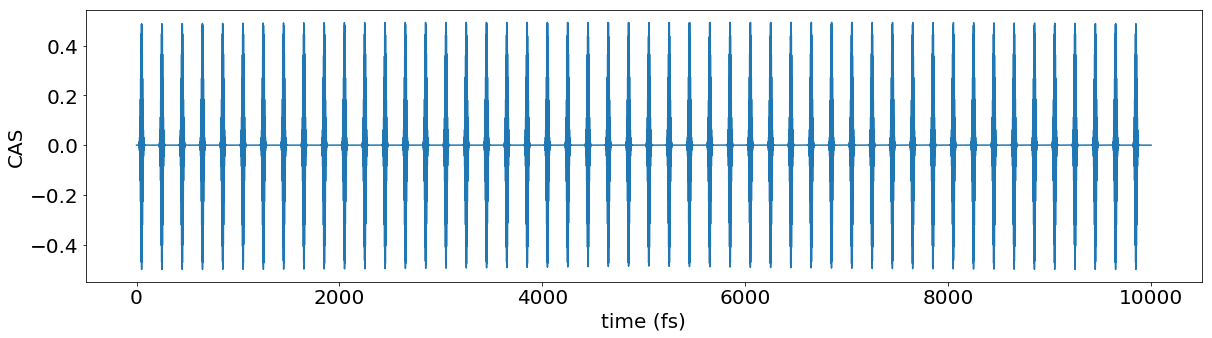

In [23]:
# Plot the figure
plt.figure(figsize=(20,5))
plt.rcParams.update({'font.size': 20})
plt.plot(time, signalp.real)
plt.xlabel("time (fs)")
plt.ylabel("CAS")
plt.show()

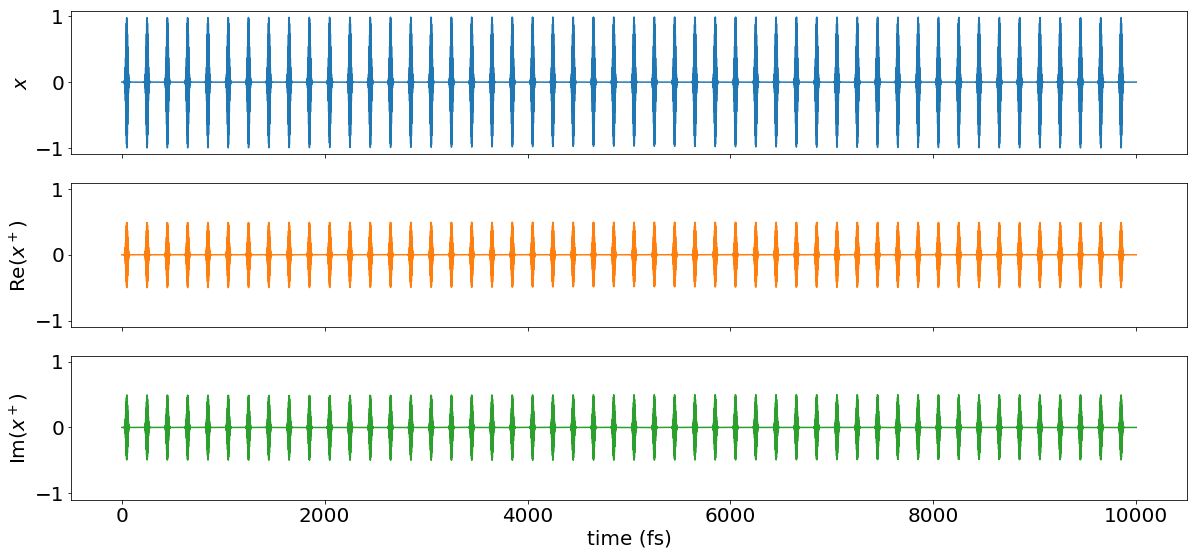

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex='col', sharey=True, figsize=(20,9))
ax1.plot(time, signal, color = 'C0')
ax2.plot(time, signalp.real, color = 'C1')
ax3.plot(time, signalp.imag, color = 'C2')
ax3.set_xlabel("time (fs)")
ax1.set_ylabel("$x$")
ax2.set_ylabel("Re($x^+$)")
ax3.set_ylabel("Im($x^+$)")
plt.show()

## Appendix: Data Preparation

In [ ]:
def gaussian_envelope(t, t0, width):
    sigma = width / 1.665
    return np.exp(-((t - t0) / sigma)**2)

def carrier(t, wavelength):
    omega = 2*np.pi * 3e8 / (wavelength * 1e-9) / 1e15
    return np.sin(omega*t)

In [ ]:
# duration: 10000 fs
# repetition rate: 5 THz
# center wavelength: 800 nm
# pulse width: 20 fs

t = np.linspace(0, 10000, 50000)
delay = 200
i = 0
a = t - t
while i*delay < t[-1]:
    a = a + gaussian_envelope(t, 50 + i*delay, 20)
    i = i + 1
a = a * carrier(t, 800)

with open('demo-pulse-train_1.csv', 'w', newline='') as csvfile:
    datawriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    datawriter.writerow(['time', 'signal'])
    for i in range(len(t)):
        datawriter.writerow([t[i], a[i]])

In [ ]:
# duration: 10000 fs
# repetition rate: 2 THz
# center wavelength: 800 nm
# pulse width: 20 fs

t = np.linspace(0, 10000, 50000)
delay = 500
i = 0
a = t - t
while i*delay < t[-1]:
    a = a + gaussian_envelope(t, 50 + i*delay, 20)
    i = i + 1
a = a * carrier(t, 800)

with open('demo-pulse-train_2.csv', 'w', newline='') as csvfile:
    datawriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    datawriter.writerow(['time', 'signal'])
    for i in range(len(t)):
        datawriter.writerow([t[i], a[i]])